###Μηχανική Μάθηση
####2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



### Εισαγωγή

Στην άσκηση αυτή θα εξερευνήσετε τεχνικές συσταδοποίησης και μείωσης διαστατικότητας σε εικόνες, ξεκινώντας από υπερφασματικά δεδομένα και προχωρώντας σε δεδομένα τηλεπισκόπησης.

- **Μέρος 1**: Θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης **k-means**, καθώς και την **fuzzy c-means**, σε συνδυασμό με τη μέθοδο μείωσης διαστατικότητας **PCA**, για την ανάλυση μιας υπερφασματικής εικόνας.

- **Μέρος 2**: Θα εργαστείτε με ένα σύνολο δεδομένων τηλεπισκόπησης και, με τη βοήθεια ενός προεκπαιδευμένου CNN, θα εξάγετε χαρακτηριστικά εικόνων για συσταδοποίηση, συγκρίνοντας τα αποτελέσματα με τη συσταδοποίηση με χρήση των pixels.

Ονοματεπώνυμο φοιτητή: IOANNIS MARIOS MAVROMATIS

### 1. Φόρτωση υπερφασματικής εικόνας και των επισημειώσεων της

Κατεβάστε την υπερφασματική εικόνα `salinas_image.npy` και τις αντίστοιχες επισημειώσεις `salinas_labels.npy` από το Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.α. Φορτώστε την εικόνα και τις αντίστοιχες επισημειώσεις με χρήση της συνάρτησης np.load.

Η συσταδοποίηση (clustering) είναι μια τεχνική ανάλυσης δεδομένων στην οποία τα δεδομένα χωρίζονται σε ομάδες, ή συστάδες, έτσι ώστε τα δεδομένα που ανήκουν στην ίδια συστάδα να είναι πιο παρόμοια μεταξύ τους σε σχέση με τα δεδομένα που ανήκουν σε άλλες συστάδες.
Αντίθετα, ο στόχος είναι να βρεθούν κοινά χαρακτηριστικά ή μοτίβα στα δεδομένα και να τα ομαδοποιήσουμε με βάση την ομοιότητα.

Η μείωση διαστατικότητας (dimensionality reduction) είναι μια τεχνική επεξεργασίας δεδομένων που χρησιμοποιείται για τη μείωση του αριθμού των χαρακτηριστικών ή των μεταβλητών σε ένα σύνολο δεδομένων, χωρίς να χάνεται σημαντική πληροφορία.


In [1]:
# Import necessary libraries
import numpy as np

# Define the file paths (adjust to your folder structure)
image_path = 'salinas_image.npy'
labels_path = 'salinas_labels.npy'

# Load the hyperspectral image and labels using np.load
salinas_image = np.load(image_path)
salinas_labels = np.load(labels_path)

# Print basic information about the loaded data
print(f"Salinas Image shape: {salinas_image.shape}")
print(f"Salinas Labels shape: {salinas_labels.shape}")


Salinas Image shape: (512, 217, 204)
Salinas Labels shape: (512, 217)


----------------------------------------------------------------

Μια υπερφασματική εικόνα (hyperspectral image) καταγράφει δεδομένα σε πολλές φασματικές ζώνες, που συνήθως κυμαίνονται από εκατοντάδες λωρίδες. Κάθε pixel σε μια υπερφασματική εικόνα περιέχει πληροφορίες για την ένταση του φωτός σε αυτές τις λωρίδες (π.χ., 200-300 λωρίδες), που αντιστοιχούν σε διαφορετικά μήκη κύματος.

Οι επισημειώσεις (labels ή annotations) μιας υπερφασματικής εικόνας αναφέρονται στις πληροφορίες που αντιστοιχούν σε κάθε pixel της εικόνας και περιγράφουν την κατηγορία ή τον τύπο της επιφάνειας που βρίσκεται σε κάθε συγκεκριμένο σημείο (πχ, broccoli, backrgound, etc...)

----------------------------------------------------------------


******Οι επισημειώσεις που φορτώσατε αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές κατηγορίες:******

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας στο ίδιο διάγραμμα

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση.

----------------------------------------------------------------
#2α

Τα υπερφασματικά κανάλια (hyperspectral channels) σε μια υπερφασματική εικόνα αναφέρονται στις διαφορετικές φασματικές ζώνες που καταγράφει το υπερφασματικό σύστημα.
Κάθε κανάλι αντιστοιχεί σε ένα συγκεκριμένο εύρος μήκους κύματος που βρίσκεται στο φάσμα του ηλεκτρομαγνητικού φάσματος.

----------------------------------------------------------------


----------------------------------------------------------------

<font color='orange'>Καθε καναλι και μια συχνοτητα</font>

----------------------------------------------------------------


<font color='orange'>Υπερφασματικη εικονα - Hyperspectral Image:</font><br>
<br>
<font color='orange'>Ολα τα καναλια μαζι σε μια εικονα.</font><br>
<br>
<font color='orange'>Καθε καναλι αποτελειται απο πολλα pixel.</font><br>
<br>
<font color='orange'>To καθε pixel περιεχει χρησιμη πληροφορια</font>


---------------------------------------------------------------

In [2]:
#2a

# Print basic information about the shape of the hyperspectral image
height, width, num_channels = salinas_image.shape

print(f"Height of the image: {height}")
print(f"Width of the image: {width}")
print(f"Number of spectral channels: {num_channels}")


Height of the image: 512
Width of the image: 217
Number of spectral channels: 204


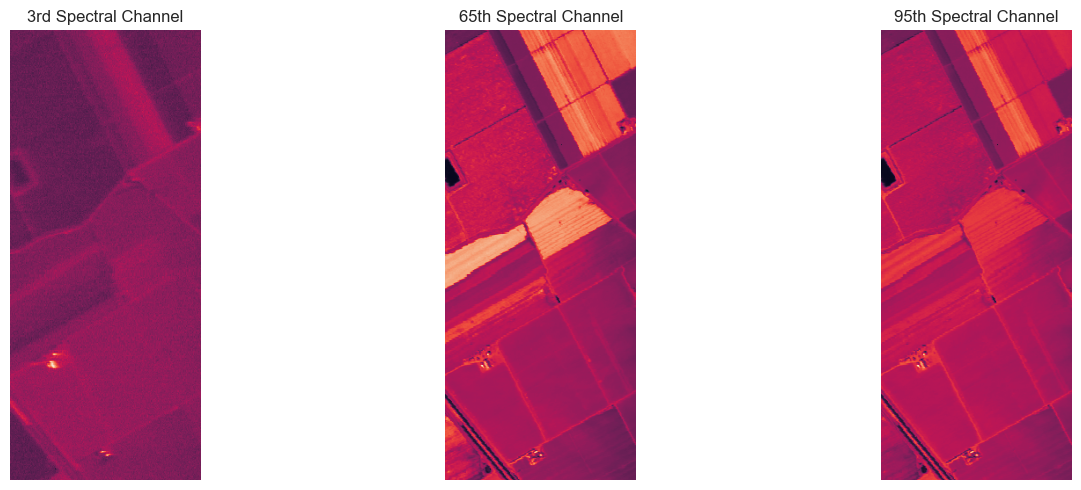

In [3]:
#2b
import matplotlib.pyplot as plt

# Select the channels
channel_3 = salinas_image[:, :, 2]  # 3rd channel (index 2 because Python is 0-indexed)
channel_65 = salinas_image[:, :, 64]  # 65th channel (index 64)
channel_95 = salinas_image[:, :, 94]  # 95th channel (index 94)

# Plot the channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 3rd channel
axes[0].imshow(channel_3)
axes[0].set_title("3rd Spectral Channel")
axes[0].axis("off")

# 65th channel
axes[1].imshow(channel_65)
axes[1].set_title("65th Spectral Channel")
axes[1].axis("off")

# 95th channel
axes[2].imshow(channel_95)
axes[2].set_title("95th Spectral Channel")
axes[2].axis("off")

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
#2c Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

# Calculate unique categories in the labels
unique_categories = np.unique(salinas_labels)
# num_categories = len(unique_categories)
#
# print(f"Number of different crop categories: {num_categories}")
print(f"Unique categories: {len(unique_categories)}")


Unique categories: 17


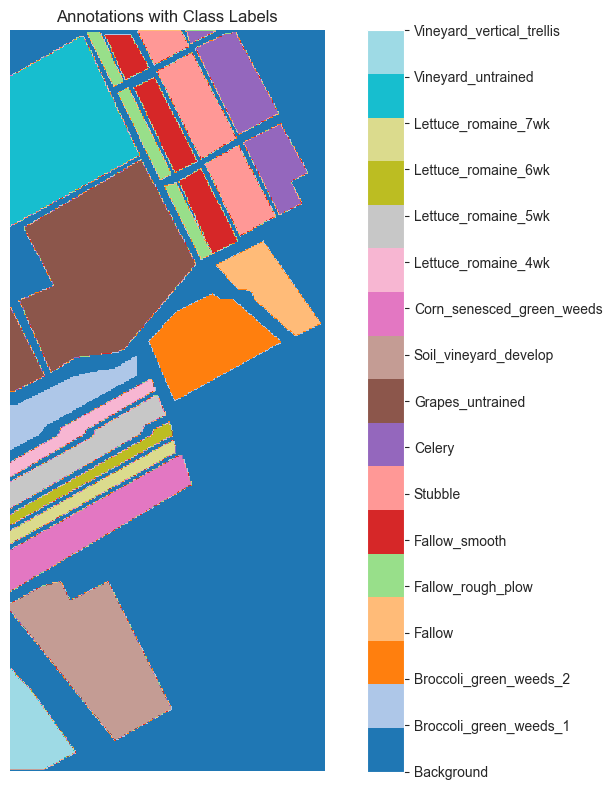

In [5]:
#2d
# Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

import matplotlib.pyplot as plt

classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

# Define a colormap and norm for unique categories
num_classes = len(classes)  # Number of crop categories (including "Background")
cmap = plt.get_cmap("tab20", num_classes)  # Use a colormap with 20 distinct colors


# Plot the annotations
plt.figure(figsize=(10, 8))
annotation_plot = plt.imshow(salinas_labels, cmap=cmap)
plt.title("Annotations with Class Labels")
plt.axis("off")


# Add a legend
cbar = plt.colorbar(annotation_plot, ticks=range(num_classes), orientation='vertical')
cbar.ax.set_yticklabels(classes)  # Assign class names to the legend ticks

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
#2e
# Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση == annotation

# Calculate the count of pixels for each annotation
unique_labels, pixel_counts = np.unique(salinas_labels, return_counts=True)

# Display the results
print("Pixel counts per annotation:")
for label, count in zip(unique_labels, pixel_counts):
    print(f"{classes[label]}: {count} pixels")


Pixel counts per annotation:
Background: 56975 pixels
Broccoli_green_weeds_1: 2009 pixels
Broccoli_green_weeds_2: 3726 pixels
Fallow: 1976 pixels
Fallow_rough_plow: 1394 pixels
Fallow_smooth: 2678 pixels
Stubble: 3959 pixels
Celery: 3579 pixels
Grapes_untrained: 11271 pixels
Soil_vineyard_develop: 6203 pixels
Corn_senesced_green_weeds: 3278 pixels
Lettuce_romaine_4wk: 1068 pixels
Lettuce_romaine_5wk: 1927 pixels
Lettuce_romaine_6wk: 916 pixels
Lettuce_romaine_7wk: 1070 pixels
Vineyard_untrained: 7268 pixels
Vineyard_vertical_trellis: 1807 pixels


### 3. Εύρεση φασματικών υπογραφών

----------------------------------------------------------------

<font color='orange'>Η φασματική υπογραφή (Spectral Signature) είναι μια μοναδική καμπύλη που περιγράφει τη φασματική απόκριση ενός υλικού σε διαφορετικά μήκη κύματος του ηλεκτρομαγνητικού φάσματος.</font>


 Κάθε υλικό (π.χ. φυτά, έδαφος, κ.λπ.) έχει μια ξεχωριστή φασματική υπογραφή, η οποία μπορεί να χρησιμοποιηθεί για την αναγνώριση και ανάλυση χαρακτηριστικών στα δεδομένα τηλεπισκόπησης και τις υπερφασματικές εικόνες.

----------------------------------------------------------------


3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν.

💡 Χρησιμοποιήστε την `numpy reshape`

In [7]:
#3a
# Get the dimensions of the hyperspectral image
height, width, num_channels = salinas_image.shape


# bc N == total number of pixels
N=height*width
# Reshape the hyperspectral image into an N x K matrix
hyperspectral_matrix = salinas_image.reshape(N, num_channels)  # Shape: (N, K)



# Reshape the annotations into a vector of length N
annotations_vector = salinas_labels.reshape(N)  # Shape: (N,)

# Print the shapes for verification
print(f"Hyperspectral image reshaped to: {hyperspectral_matrix.shape}")
print(f"Annotations reshaped to: {annotations_vector.shape}")


Hyperspectral image reshaped to: (111104, 204)
Annotations reshaped to: (111104,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνα από κάθε κατηγορία, και σχεδιάστε την υπερφασματική υπογραφή των επιλεγμένων πίξελ.

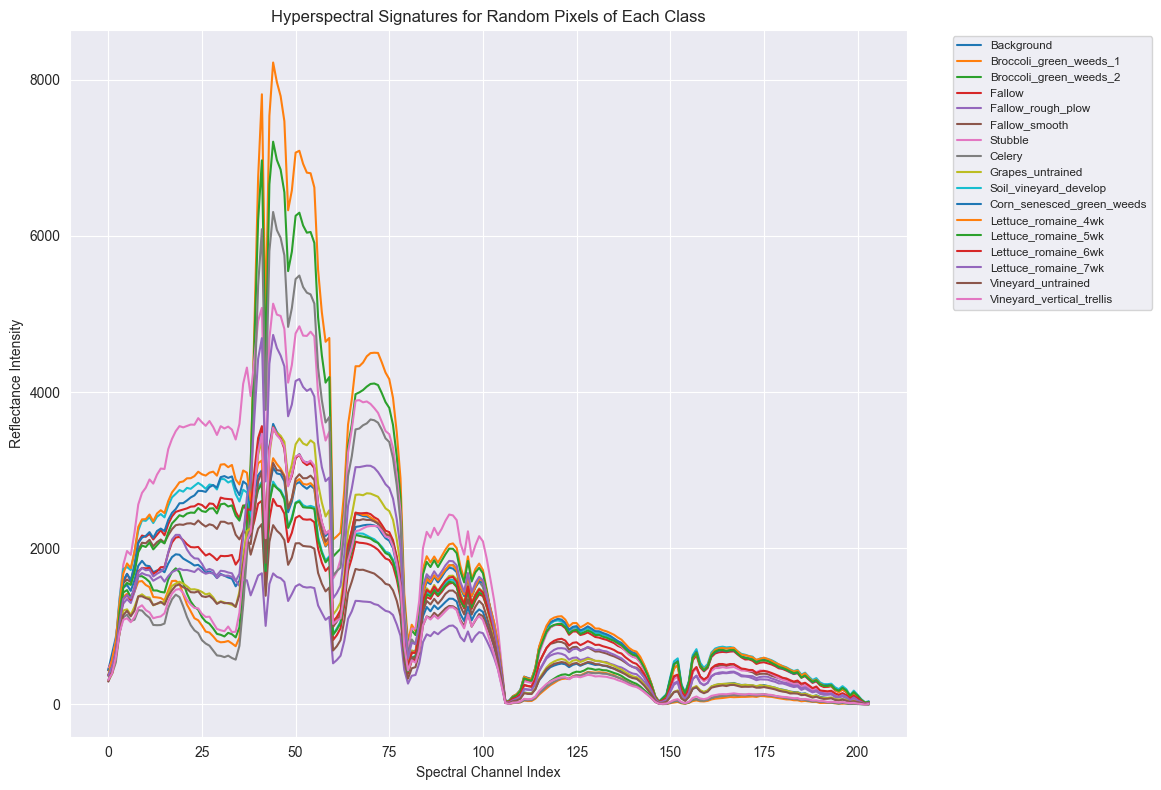

In [8]:
#3b
import matplotlib.pyplot as plt
import numpy as np

# Get the unique labels and their corresponding indices
unique_labels = np.unique(annotations_vector)

#stores random pixel indices for each class
random_pixels = {}

# For each class, select a random pixel index
for label in unique_labels:
    indices = np.where(annotations_vector == label)[0]
    random_pixels[label] = np.random.choice(indices)

plt.figure(figsize=(12, 8))
for label in unique_labels:
    pixel_index = random_pixels[label]
    hyperspectral_signature = hyperspectral_matrix[pixel_index]
    plt.plot(hyperspectral_signature, label=classes[label])

plt.xlabel("Spectral Channel Index")
plt.ylabel("Reflectance Intensity")
plt.title("Hyperspectral Signatures for Random Pixels of Each Class")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')
plt.tight_layout()
plt.show()




3.γ. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Προκειμενου 2 καλλιεργειες να ειναι ευκολα διαχωρισιμεςς σε ενα καναλι, οφειλουν να εχουν διαφορετικη τιμη αντανακλασης, η οποια καθοριζει τη φασματικη τους υπογραφη
* Ορισμενες καλλιεργειες ειναι πιο ευκολα διαχωρισιμες απο αλλες, μιας και σε ορισμενα channels, εχουν ξεχωριστες τιμες αντανακλασης.
* Μελετώντας κανεις το διαγραμα φασματικων υπογραφων, διαπιστωνει οτι δεν ειναι ολα τα channels χρησιμα, για την ταξινομηση των καλλιεργειων. Πχ, κοντα στο channel 150, οι τιμες που λαμβανουν οι καλλιεργειες ειναι αρκετα κοντα μεταξυ τους (περιττη πληροφορια)

3.δ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

<font color='orange'>correlation -> 1: warm χρωμα</font>

<font color='orange'>correlation -> -1: cool χρωμα</font>


<font color='orange'>
Συσχετιση μεταξυ των καναλιων, πρακτικα, σημαινει ποσο "παρομοια" ειναι η συμπεριφορα 2 τυχαιων καναλιων.
<br><br>
Η "συμπεριφορα", πρακτικα σημαινει τι ομοιοτητα υπαρχει αναμεσα στα reflectance values, των pixels, εκεινου του καναλιου.
</font>


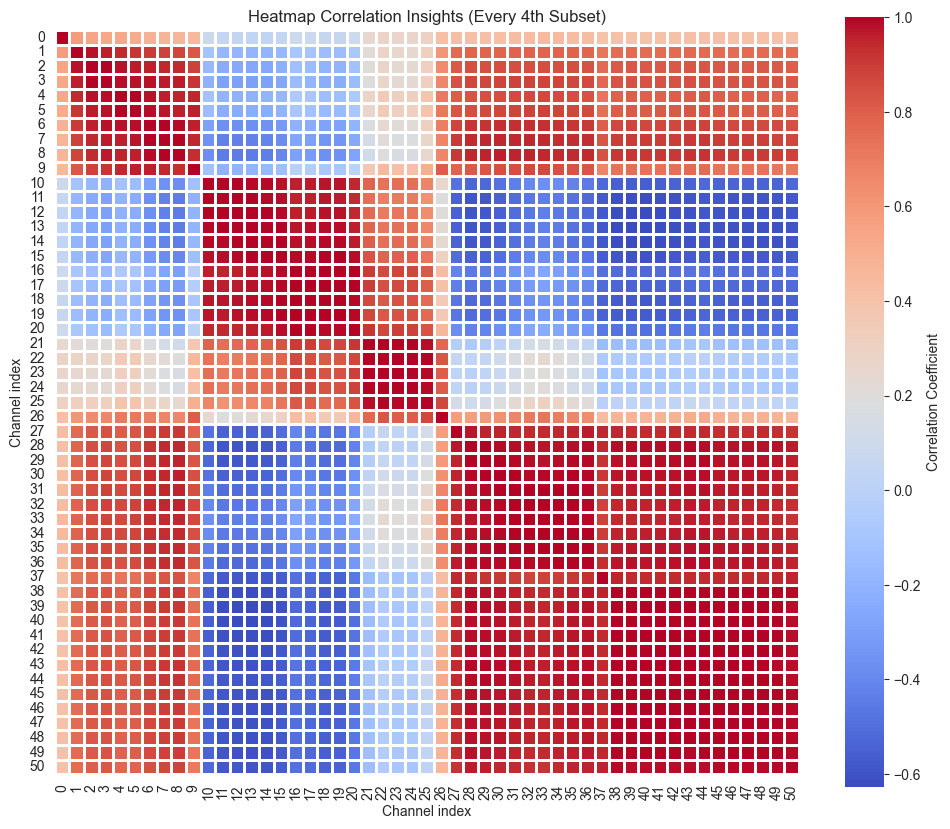

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select every 4th spectral channel to speed up visualization
selected_channels = salinas_image[:, :, ::4]  # Subsampling every fourth channel

# Step 2: Reshape these channels for fast correlation calculations
reshaped_channels = selected_channels.reshape(-1, selected_channels.shape[-1])

# Step 3: Calculate the correlation matrix
correlation_matrix = np.corrcoef(reshaped_channels, rowvar=False)

# Step 4: Visualize the heatmap with seaborn using the "coolwarm" colormap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=2,
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title("Heatmap Correlation Insights (Every 4th Subset)")
plt.xlabel("Channel index")
plt.ylabel('Channel index')

plt.show()


Οπως ειναι εμφανες, τα καναλια 10 με 20, εχουν πολυ αρνητικη συσχετιση, σεε σχεεση με τα αλλα καναλια (0 ως 9), (η διαφορα ειναι αισθητη). Επιπλεον,τα καναλια 26 ως 50 και 0 ως 9 δειχνουνξ αρκετα υψηλη συσχετιση

### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=17`.

Αξιολογήστε την απόδοση του αλγορίθμου χρησιμοποιώντας τις ακόλουθες μετρικες:

* Adjusted Rand Index
* Silhouette Score

<font color="orange">
Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.

Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

Ο Silhouette Score είναι ένα μέτρο εσωτερικής αξιολόγησης, που εξετάζει τη συνοχή και τον διαχωρισμό των συστάδων χωρίς να λαμβάνει υπόψη πραγματικές κατηγορίες. Αντίθετα, ο Adjusted Rand Index (ARI) είναι μέτρο εξωτερικής αξιολόγησης, που συγκρίνει τις συστάδες με τις πραγματικές κατηγορίες (ground truth). Η χρήση και των δύο μαζί παρέχει μια συνολική εικόνα της ποιότητας της συσταδοποίησης.
</font>


----------------------------------------------------------------





<font color="orange">
Ο αλγόριθμος k-means ομαδοποιεί δεδομένα προσπαθώντας να διαχωρίσει δείγματα σε n συστάδες(==clusters) ίσης διακύμανσης ==(variance), ελαχιστοποιώντας ένα κριτήριο γνωστό ως αδράνεια (inertia).

The variance of a cluster is a measure of how spread out the points (or data samples) within the cluster are around the cluster's centroid

Η αδράνεια μετρά το άθροισμα των τετραγώνων των αποστάσεων (sum of squared distances) κάθε σημείου(==pixel) από το κέντρο μ_κ (centroid) της συστάδας στην οποία ανήκει. Είναι ένα μέτρο του πόσο "συμπαγείς" είναι οι συστάδες.

Ο KMeans αντιστοιχεί κάθε δείγμα σε μία συστάδα(==cluster)
</font>


Αυτός ο αλγόριθμος απαιτεί να καθοριστεί (input απο εμας) ο αριθμός των συστάδων (clusters). Κλιμακώνεται καλά σε μεγάλους αριθμούς δειγμάτων και έχει χρησιμοποιηθεί σε μεγάλο εύρος εφαρμογών και σε πολλά και διαφορετικά πεδία.

Ο αλγόριθμος k-means διαιρεί ένα σύνολο  𝑋  που περιέχει  𝑁  δείγματα σε  𝐾  ασύνδετες συστάδες  𝐶 . Η κάθε συστάδα περιγράφεται από τον μέσο  μ𝑗  των δειγμάτων της.

***Τα μέσα ονομάζονται συνήθως «κέντρα» των συστάδων. Σημειώστε ότι δεν είναι, γενικά, σημεία από το  Χ , αν και υπάρχουν στον ίδιο χώρο.***


----------------------------------------------------------------

<font color="yellow">
The k-means algorithm is a clustering technique used to group data into a specified number of clusters, k. It works as follows:


Initialization: Randomly select k points in the data space to act as the initial cluster centroids (these are the center points of the clusters).

Assignment Step: Assign each data point to the nearest cluster centroid based on a distance metric, usually Euclidean distance . This creates k groups of data points.

d(xᵢ, Cⱼ) = √((xᵢ₁ - Cⱼ₁)² + (xᵢ₂ - Cⱼ₂)² + ... + (xᵢₖ - Cⱼₖ)²) (riza)

C == CENTROID

(Inertia is the sum of the squared Euclidean distances between each data point and the centroid of the cluster TO WHICH IT BELONGS!!!!!!)

Update Step: Calculate the new centroid for each cluster as the mean (average) of all data points currently assigned to that cluster.

MEANING: C_new == Σxn / N       !!! (this converges to a single pixel == datapoint)

Repeat: Steps 2 and 3 are repeated until either:

The centroids stop moving significantly (convergence).
A maximum number of iterations is reached.
Output: The algorithm returns:

The final cluster centroids.
The cluster assignments for each data point.
</font>


----------------------------------------------------------------



In [10]:
#4a
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Step 1: Apply KMeans clustering to the hyperspectral data
n_clusters = 17

# Fit the KMeans model on the reshaped hyperspectral data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# 42, so that: The initial centroids are always the same.


kmeans_labels = kmeans.fit_predict(hyperspectral_matrix)
# The fit method trains the k-means model on the hyperspectral_matrix data
# After fitting, the predict method assigns each data point in the dataset (hyperspectral_matrix) to a cluster by finding the nearest centroid.



# Step 2: Evaluate the clustering performance

# Calculate Adjusted Rand Index (compares clustering with ground truth)







# Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.
ari = adjusted_rand_score(annotations_vector, kmeans_labels)
print(f"Adjusted Rand Index (ARI): {ari}")
# anottations == labels_reshaped

# Calculate Silhouette Score (internal evaluation of clustering cohesion and separation)




# Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

silhouette = silhouette_score(hyperspectral_matrix, kmeans_labels)
print(f"Silhouette Score: {silhouette}")


Adjusted Rand Index (ARI): 0.14654750991968155
Silhouette Score: 0.41253853421064896


4.β. Χρησιμοποιώντας τα αποτελέσματα τις συσταδοποίησης, σχεδιάστε πάλι με χρήση της matplotlib την ταξινόμηση σε μορφή εικόνας, χρησιμοποιώντας για κάθε pixel τη συστάδα στην οποία έχει ανατεθεί.

Συγκρίνετε με την αρχική εικόνα των επισημειώσεων. Τι παρατηρείτε;

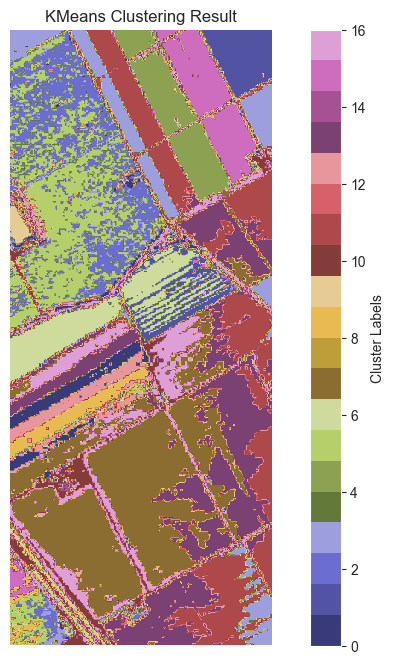

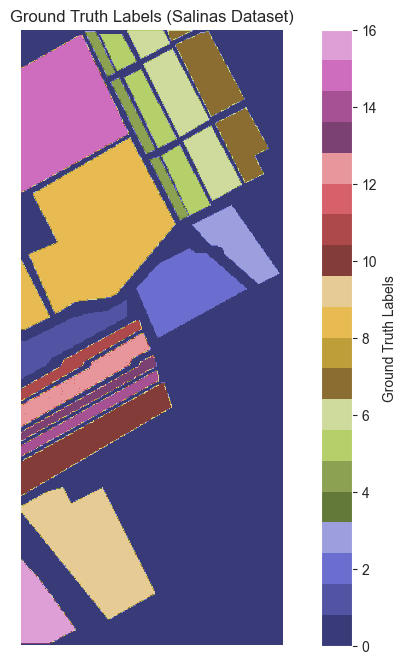

In [11]:
#4b
# επισημειωση == annotation == label


# Visualize KMeans clustering results
# Visualize KMeans clustering results
# Visualize KMeans clustering results
plt.figure(figsize=(10, 8))
plt.imshow(kmeans_labels.reshape(salinas_image.shape[0], salinas_image.shape[1]), cmap='tab20b')
plt.colorbar(label='Cluster Labels')
plt.title('KMeans Clustering Result')
plt.axis('off')
plt.show()

# Visualize the ground-truth annotations
plt.figure(figsize=(10, 8))
plt.imshow(salinas_labels.reshape(salinas_image.shape[0], salinas_image.shape[1]), cmap='tab20b')
plt.colorbar(label='Ground Truth Labels')
plt.title('Ground Truth Labels (Salinas Dataset)')
plt.axis('off')
plt.show()




(το γαλαζιο ειναι to background)

Ειναι εμφανες οτι σε ορισμενες συσταδες, οπως εκεινες που βρισκονται στο πανω δεξια μερος της εικονας, εχουν ταξινομηθει πολυ ευστοχα.

Ωστοσο, αυτο δεν ισχυει για την πλειοψηφια των αλλων συσταδων. Επιπλεον, ενδεχεται να εχει γινει καποιο overlapping με το γαλαζιο background (συσταδα background), μιας και η συγκεκριμενη συσταδα δεν εχει αναγνωριστει καθολου.

4.γ. Εφαρμογή του αλγορίθμου Fuzzy C-Means

Ο αλγόριθμος **Fuzzy C-Means** δεν περιλαμβάνεται στο scikit-learn, αλλά μπορούμε να τον εφαρμόσουμε χρησιμοποιώντας τη βιβλιοθήκη `fcmeans`.

#### **Βήμα 1: Εγκατάσταση της βιβλιοθήκης**
Πρώτα, εγκαταστήστε τη βιβλιοθήκη `fcmeans` εκτελώντας την παρακάτω εντολή σε ένα κελί:

```bash
!pip install fuzzy-c-means
```

#### Βήμα 2: Εκτέλεση του αλγορίθμου
Η fcmeans παρέχει λειτουργικότητα αντίστοιχη με τον τρόπο εκπαίδευσης του scikit-learn, επιτρέποντας εύκολη ενσωμάτωση στη ροή εργασιών σας.

Για περισσότερες πληροφορίες σχετικά με τη χρήση της βιβλιοθήκης, δείτε το documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Υπολογίστε πάλι το Silhouette Score και το ARI και συγκρίνετε με τις προηγούμενες μεθόδους.

Note. Ο αλγόριθμος θα τρέξει περίπου 15 λεπτά.

In [12]:
!pip install fuzzy-c-means

<font color='orange'>The Fuzzy C-Means (FCM) algorithm is a clustering method similar to k-means but with a key difference:</font>



<span style="color:orange">**Instead of assigning each data point to exactly one cluster, it allows partial membership in multiple clusters (soft clustering) **</span>


<font color='orange'>Ενώ ο k_means αντιστοιχίζει ένα data point σε ένα Cluster (hard clustering)</font>


                Fuzzy  C Means

### 1. Initialization

- Select the number of clusters **c**.
- Initialize a membership matrix **U** of shape **n × c**, where **n** is the number of data points. Each element **u_ij** in **U** represents the degree of membership of the **i-th** data point in the **j-th** cluster. Initially, these values are randomly assigned, ensuring that:

  $$ \sum_{j=1}^c u_{ij} = 1 \quad \text{for all } i $$

- Define the fuzziness parameter **m > 1**, which controls how "fuzzy" the membership assignment is. Higher **m** results in more overlap between clusters.

---

### <font color='orange'>Fuzzy C-Means (FCM) Objective Function</font>

- <font color='orange'>**Goal**</font>: Minimize a generalized function that incorporates membership values and distances.

- <font color='orange'>**Mathematical Representation**</font>:
  $$
  J = \sum_{i=1}^{n} \sum_{j=1}^{k} u_{ij}^m || x_i - C_j ||^2
  $$
  <font color='orange'>
  - \(n\): Total number of data points.

  - \(k\): Total number of clusters.

  - \(u_{ij}\): Membership value of the \(i\)-th data point to the \(j\)-th cluster.

  - \(m\): **Fuzziness parameter** (controls how much overlap clusters can have).

  - \(m > 1\): Higher values mean points can belong more flexibly to multiple clusters.

  - \(|| x_i - C_j ||^2\): Squared Euclidean distance between a point and a cluster centroid.
  </font>


-----------------------------------------------------


### 2. Iterative Optimization

The algorithm alternates between updating the cluster centroids and the membership values until convergence.

#### a. **Update Cluster Centroids**

The cluster centroids **v_j** for cluster **j** are calculated as:

$$ v_j = \frac{\sum_{i=1}^n \left( u_{ij}^m \cdot x_i \right)}{\sum_{i=1}^n u_{ij}^m} $$

Where:
- **x_i** is the **i-th** data point.
- **u_ij** is the membership value of the **i-th** data point in the **j-th** cluster.
- **m** is the fuzziness parameter.

#### b. **Update Membership Values**

The membership values **u_ij** are updated based on the distances of each data point from the cluster centroids:

$$ u_{ij} = \frac{1}{\sum_{k=1}^c \left( \frac{\|x_i - v_j\|}{\|x_i - v_k\|} \right)^{\frac{2}{m-1}}} $$

Where:
- **‖x_i - v_j‖** represents the Euclidean distance between **x_i** and **v_j**.

---

### 3. Stopping Criteria

The algorithm stops when:
- The cluster centroids stabilize (i.e., changes in centroids are below a pre-defined threshold).
- A maximum number of iterations is reached.



In [13]:
#4c

# Import the necessary module for Fuzzy C-Means
from fcmeans import FCM
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply Fuzzy C-Means clustering with 17 clusters
fuzzy_cmeans = FCM(n_clusters=17, random_state=42)
fuzzy_cmeans.fit(hyperspectral_matrix)
# The fit method trains the FCM model on the hyperspectral_matrix data

# Predict the cluster memberships for the dataset
fuzzy_labels = fuzzy_cmeans.predict(hyperspectral_matrix)

# Evaluate the clustering using Silhouette Score
fuzzy_silhouette_score = silhouette_score(hyperspectral_matrix, fuzzy_labels)
print("Fuzzy C-Means Results:")
print(f"Silhouette Score: {fuzzy_silhouette_score:.4f}")

# Evaluate the clustering using Adjusted Rand Index
fuzzy_ari_score = adjusted_rand_score(annotations_vector, fuzzy_labels)
print(f"Adjusted Rand Index (ARI): {fuzzy_ari_score:.4f}")

Fuzzy C-Means Results:
Silhouette Score: 0.3572
Adjusted Rand Index (ARI): 0.1353


### 5. Μείωση διαστατικότητας δεδομένων


5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

Αντί να επιλέγετε αυθαίρετα την πλησιέστερη συστάδα για κάθε δείγμα, το οποίο ονομάζεται hard clustering, ίσως είναι καλύτερο να μετρήσετε την απόσταση κάθε δείγματος από τα κέντρα και των 5 συστάδων. Αυτό κάνει η μέθοδος transform():

# <font color='orange'>PCA</font>

- <font color='orange'>Πρώτα προσδιορίζει το υπερεπίπεδο που βρίσκεται πιο κοντά στα δεδομένα και μετά προβάλλει τα δεδομένα σε αυτό.</font>

- <font color='orange'>Για να μπορέσουμε να προβάλουμε το σύνολο εκπαίδευσης σε ένα υπερεπίπεδο χαμηλότερης διάστασης, πρέπει πρώτα να επιλέξουμε το σωστό υπερεπίπεδο.</font>
- <font color='orange'>Φαίνεται λογικό να επιλέξουμε τον άξονα που διατηρεί το μέγιστο ποσό διακύμανσης, καθώς πιθανότατα θα χάσει λιγότερες πληροφορίες από τις άλλες προβολές.</font>
- <font color='orange'>Ένας άλλος τρόπος για να δικαιολογηθεί αυτή η επιλογή είναι ότι είναι ο άξονας που ελαχιστοποιεί τη μέση τετραγωνική απόσταση μεταξύ του αρχικού συνόλου δεδομένων και της προβολής του σε αυτόν τον άξονα.</font>



-----------------------------------------------------


# <font color='orange'>Κύριες Συνιστώσες - Principal Components</font>

- <font color='orange'>Το PCA προσδιορίζει τον άξονα που αντιπροσωπεύει τη μεγαλύτερη ποσότητα διακύμανσης στο σύνολο εκπαίδευσης. Επιπλέον βρίσκει ένα δεύτερο άξονα, ορθογώνιο ως προς τον πρώτο, που αντιπροσωπεύει το μεγαλύτερο ποσό διακύμανσης που απομένει.</font>


-----------------------------------------------------

<font color='orange'>
PCA (Principal Component Analysis):

*   **PCA** is a technique used to reduce the dimensionality of a dataset, while retaining as much of the variance as possible. It does this by transforming the data into a new coordinate system, where the axes (principal components) are ordered (κατα σειρα) by the amount of variance they explain in the data.

*   **n_components=3**: This means that the data will be reduced to 3 dimensions (3 principal components). So, instead of dealing with a high-dimensional feature space, PCA will create a new 3D space where the data is projected.
</font>


In [14]:
#5a
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(hyperspectral_matrix)

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

<font color='orange'>
The <strong>explained variance</strong> tells us how much of the original data's spread (variance) is captured by each principal component after applying PCA. Each principal component represents a direction in the data that captures a certain amount of variability.

* The <strong>first principal component</strong> captures the largest possible variance in the data.
* The <strong>second principal component</strong> captures the next largest variance, and so on.

The <strong>sum of the explained variance</strong> for all components equals the total variance of the original dataset.
</font>


In [15]:
#5b
explained_variance = pca.explained_variance_ratio_

# Calculate the total variance explained by the first 3 components
total_variance_retained = explained_variance.sum()
total_variance = explained_variance.sum()

print("Explained Variance Ratio:", explained_variance)
#  (for each compoenent)

print(f"Total variance: {total_variance:.4f}")
# (retained with 3 components)


# Convert to percentage
variance_percentage = total_variance_retained * 100

print(f"Percentage of Variance Retained with n_components=3: {variance_percentage:.2f}%")


Explained Variance Ratio: [0.74473713 0.23531325 0.01134124]
Total variance: 0.9914
Percentage of Variance Retained with n_components=3: 99.14%


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές. Τι συμπεράσματα βγάζετε;

6.β. Δοκιμάστε διαφορετικές τιμές για το n_components (από 1 έως 5) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό n_components και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

# <font color='orange'>Reducing dimensions effects on K-Means:</font>

<font color='orange'>**Bonus:**</font>
- <font color='orange'>Faster computation</font>
- <font color='orange'>Reduced noise</font>
- <font color='orange'>Avoiding sparse, long-distance-between-them data (curse of dimensionality)</font>

<font color='orange'>**Minus:**</font>
- <font color='orange'>Loss of important information</font>
- <font color='orange'>Danger of over-simplification</font>


In [16]:
#6a

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply KMeans on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=17, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(reduced_data)

# Calculate the metrics for the KMeans clustering
ari_pca = adjusted_rand_score(annotations_vector, kmeans_pca_labels)
silhouette_pca = silhouette_score(reduced_data, kmeans_pca_labels)

print("KMeans Clustering on PCA-Reduced Data:")
print(f"Adjusted Rand Index (ARI): {ari_pca}")
print(f"Silhouette Score: {silhouette_pca}")

KMeans Clustering on PCA-Reduced Data:
Adjusted Rand Index (ARI): 0.14729232332312386
Silhouette Score: 0.4347441594614663


Παρατηρουμε πως τα metrics δεν αλλαζουν ιδιαιτερα. Αυτο οφειλεται στο γεγονος οτι, οπως φανηκε στα προηγουμενο ερωτημα, το ποσοστο διακυμανσης, υστερα απο την μειωση διαστασεων, ηταν πολυ μεγαλο
(αγγιζε το 100%)

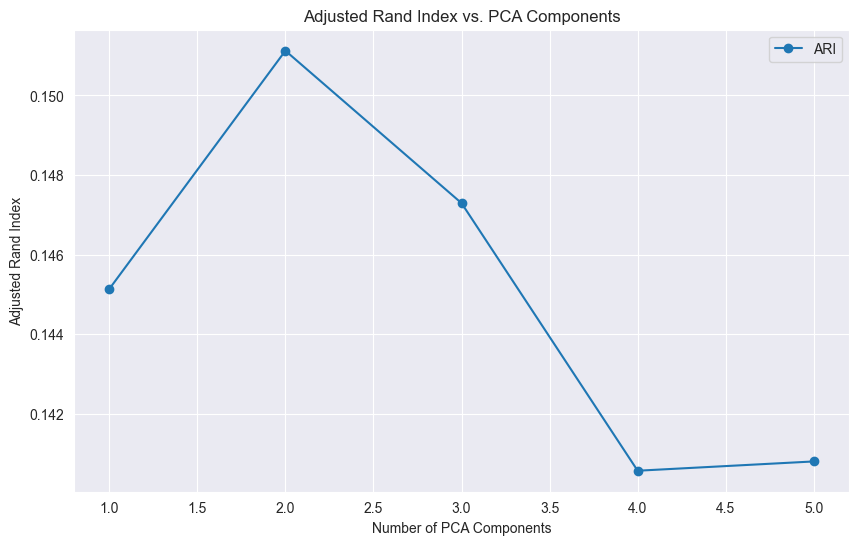

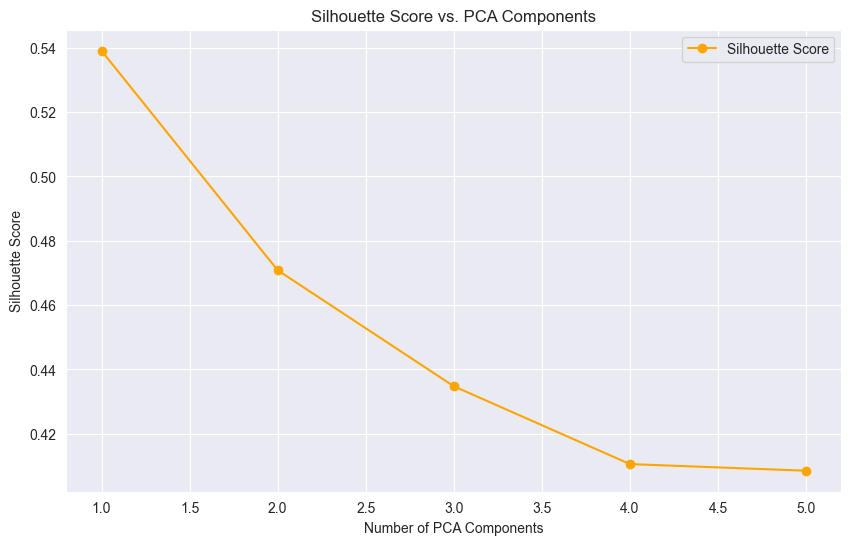

In [17]:
#6b

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt

# Initialize lists to store the results
n_components_range = range(1, 6)
ari_scores = []
silhouette_scores = []

# Loop over n_components values
for n_components in n_components_range:
    # Apply PCA with the current n_components
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(hyperspectral_matrix)

    # Apply KMeans clustering on the reduced data
    kmeans = KMeans(n_clusters=17, random_state=42)
    kmeans_labels = kmeans.fit_predict(reduced_data)

    # Compute metrics
    ari = adjusted_rand_score(annotations_vector, kmeans_labels)
    silhouette = silhouette_score(reduced_data, kmeans_labels)

    # Store results
    ari_scores.append(ari)
    silhouette_scores.append(silhouette)

# Plot Adjusted Rand Index
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, ari_scores, marker='o', label='ARI')
plt.title("Adjusted Rand Index vs. PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Adjusted Rand Index")
plt.grid(True)
plt.legend()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title("Silhouette Score vs. PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()
plt.show()


- To ARI παραμενει σταθερο, με max στα 2 dimensions
- To Silhouette score εχει λιγο μεγαλυτερο variance, αλλα οχι πολυ. Εχει max στην 1 διασταση
- Οσο λιγοτερες οι διαστασεις τοσο καλυτερος και ο διαχωρισμος των clusters. Αυτο ειναι λογικο, αφου στις μικροτερες διαστασεις το προβλημα γινεται πιο "απλο".

# Μέρος 2: Χρήση προεκπαιδευμένου CNN για συσταδοποίηση

Σε αυτό το μέρος, θα χρησιμοποιήσουμε τη βιβλιοθήκη **Keras**, η οποία παρέχει εύκολη ενσωμάτωση προεκπαιδευμένων μοντέλων CNN και ευκολία στη διαχείριση δεδομένων. Στόχος μας είναι να αναδείξουμε τη δύναμη των χαρακτηριστικών που εξάγονται από προεκπαιδευμένα CNN (Convolutional Neural Networks) για τη συσταδοποίηση δεδομένων τηλεπισκόπησης.

Θα χρησιμοποιήσουμε ένα υποσύνολο από το σύνολο δεδομένων **EuroSAT**, το οποίο αποτελείται από δορυφορικές εικόνες κατανεμημένες σε 10 κατηγορίες (π.χ., καλλιέργειες, δάση, αστικές περιοχές).

<font color='orange'>Τα χαρακτηριστικά που θα εξάγουμε από ένα προεκπαιδευμένο CNN θα χρησιμοποιηθούν για την ομαδοποίηση των εικόνων.</font>


---

## 1. Φόρτωση του συνόλου δεδομένων

Για τους σκοπούς αυτής της άσκησης, θα χρησιμοποιήσουμε το σύνολο δεδομένων **EuroSAT**. Το EuroSAT περιλαμβάνει δορυφορικές εικόνες οργανωμένες σε φακέλους κατά κατηγορία.

---

### 1.α. Κατέβασμα και αποσυμπίεση του EuroSAT

Το EuroSAT δεν υποστηρίζεται απευθείας από το Keras, αλλά μπορείτε να το κατεβάσετε και να το αποσυμπιέσετε με τις παρακάτω εντολές:

```bash
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip
```

### 1.β. Ενσωμάτωση του Keras μέσω TensorFlow
Η βιβλιοθήκη Keras είναι ενσωματωμένη στο TensorFlow. Για να τη χρησιμοποιήσετε, πρέπει να εισάγετε τη βιβλιοθήκη TensorFlow και να χρησιμοποιήσετε τις κλάσεις της Keras μέσω του tensorflow.keras.

Παρακάτω φαίνεται πώς να φορτώσετε το EuroSAT χρησιμοποιώντας το ImageDataGenerator:


In [18]:
#1a

# Κατέβασμα του EuroSAT
# !wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
#
# # Αποσυμπίεση του αρχείου
# !unzip EuroSAT.zip

In [19]:
!pip install tensorflow


In [20]:
# !wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
# ! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=1, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


/Users/giannis/PycharmProjects/ML_ex_2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Τα δεδομένα βρίσκονται στο: 2750
Found 2700 images belonging to 10 classes.
Φορτώθηκαν 2700 εικόνες.


---

## 2. Χρήση προεκπαιδευμένου CNN για Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα, θα χρησιμοποιήσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**, το οποίο είναι διαθέσιμο μέσω της Keras.

<font color='orange'>Το μοντέλο είναι εκπαιδευμένο στο σύνολο δεδομένων **ImageNet** και μπορεί να χρησιμοποιηθεί για την εξαγωγή ισχυρών χαρακτηριστικών από εικόνες. Αυτά τα χαρακτηριστικά θα χρησιμοποιηθούν για τη συσταδοποίηση των δεδομένων.</font>


---

### 2.α. Δημιουργία Εξαγωγέα Χαρακτηριστικών

1. **Φόρτωση του MobileNetV3Small**:
   - Χρησιμοποιήστε τη βιβλιοθηκη `tensorflow.keras.applications` για να φορτώσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**.
   - Φροντίστε να ρυθμίσετε την παράμετρο `include_top=False` για να αφαιρέσετε το τελικό στρώμα ταξινόμησης.

2. **Pooling**:
   - Ενεργοποιήστε τη μέθοδο μέσου όρου (average pooling) στο τελικό στρώμα με την παράμετρο `pooling='avg'`. Αυτό θα εξασφαλίσει τη συμπύκνωση των χαρακτηριστικών σε έναν διαχειρίσιμο αριθμό διαστάσεων.


In [21]:
#2a

from tensorflow.keras.applications import MobileNetV3Small

# Load the MobileNetV3Small model with pre-trained ImageNet weights
cnn_feature_extractor = MobileNetV3Small(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(224, 224, 3)
)




### 2.β. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Χρησιμοποιήστε τον εξαγωγέα χαρακτηριστικών που δημιουργήσατε για να επεξεργαστείτε το σύνολο δεδομένων (`dataset`) και να εξαγάγετε τα χαρακτηριστικά των εικόνων μέσω της μεθόδου `.predict()`. Αποθηκεύστε τα εξαγόμενα χαρακτηριστικά σε μια μεταβλητή και εκτυπώστε τις διαστάσεις τους για να επιβεβαιώσετε ότι η εξαγωγή έγινε σωστά. Τα χαρακτηριστικά αυτά θα χρησιμοποιηθούν στο επόμενο βήμα για συσταδοποίηση.


In [22]:
#2b

# Extract features from the dataset using the CNN feature extractor
extracted_features = cnn_feature_extractor.predict(dataset, verbose=1)

# Print the shape of the extracted features to verify the extraction
print(f"Extracted features shape: {extracted_features.shape}")


/Users/giannis/PycharmProjects/ML_ex_2/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step
Extracted features shape: (2700, 576)


### 2.γ. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Εφαρμόστε τον αλγόριθμο **KMeans** στα χαρακτηριστικά που εξήχθησαν θέτωντας αριθμό συστάδων 10, και υπολογίστε τη μετρική Adjusted Rand Index.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Apply KMeans clustering to the extracted features with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(extracted_features)

# Since we need ground truth labels for Adjusted Rand Index comparison,
# let's reshape the dataset annotations into a vector
dataset_labels = dataset.labels  # This contains the ground truth labels

# Calculate the Adjusted Rand Index
ari_score = adjusted_rand_score(dataset_labels, kmeans_labels)

# Print the ARI score
print(f"Adjusted Rand Index (ARI) for KMeans clustering with 10 clusters: {ari_score}")


Adjusted Rand Index (ARI) for KMeans clustering with 10 clusters: 0.5013959271388106


### 2δ: Συσταδοποίηση Χρησιμοποιώντας Μόνο τις τιμές των Pixel

Σε αυτήν την τελευταία φάση, θα επαναλάβετε τη συσταδοποίηση **χωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN**, αλλά χρησιμοποιώντας μόνο τα pixel των εικόνων ως χαρακτηριστικά.

1. **Κανονικοποίηση των Pixel**:
   - Κάθε εικόνα πρέπει να αναδιαταχθεί σε έναν μονοδιάστατο πίνακα και να κανονικοποιηθεί στις τιμές [0, 1].

2. **Ενοποίηση Δεδομένων**:
   - Συνδυάστε τα δεδομένα από όλες τις εικόνες σε έναν μεγάλο πίνακα με διαστάσεις `(N, M)`, όπου:
     - `N`: Ο αριθμός των εικόνων.
     - `M`: Ο αριθμός των pixel κάθε εικόνας.

3. **Εφαρμογή του KMeans**:
   - Χρησιμοποιήστε τον αλγόριθμο KMeans για τη συσταδοποίηση των εικόνων.

4. **Υπολογισμός Μετρικών**:
   - Υπολογίστε τον Adjusted Rand Index.

5. **Σύγκριση Αποτελεσμάτων**:
   - Συγκρίνετε τα αποτελέσματα με τη συσταδοποίηση που έγινε χρησιμοποιώντας τα χαρακτηριστικά από το CNN.

---


In [24]:
#2d

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Step 1: Extract and normalize pixel values
pixel_data_list = []
labels_list = []

for i in range(len(dataset)):
    img, lbl = dataset[i]
    img_flat = img.reshape(-1) / 255.0  # Normalize pixel values to [0, 1]

    pixel_data_list.append(img_flat)
    labels_list.append(np.argmax(lbl[0]))  # Extract the true class label

# Step 2: cconvert to npy arrays
pixel_data_combined = np.array(pixel_data_list)
true_labels_combined = np.array(labels_list)

# Step 3: Apply KMeans clustering with 10 clusters
kmeans_model = KMeans(n_clusters=10, random_state=42)
cluster_assignments = kmeans_model.fit_predict(pixel_data_combined)

# Step 4: Calculate Adjusted Rand Index (ARI) to compare with ground truth
ari_for_pixel_data = adjusted_rand_score(true_labels_combined, cluster_assignments)

# Output the ARI score
print(f"Adjusted Rand Index (ARI) for pixel-based clustering: {ari_for_pixel_data:.4f}")


Adjusted Rand Index (ARI) for pixel-based clustering: 0.1512


Διαπιστωνουμε οτι ο ARI πεφτει κατα πολυ (απο το 0,5 στο 0,152)

### 2.ε. Οπτικοποίηση αποτελεσμάτων

Χρησιμοποιήστε τα αποτελέσματα της συσταδοποίησης τόσο από τα χαρακτηριστικά που εξήχθησαν μέσω του CNN όσο και από τις τιμές των pixel. Για κάθε μέθοδο, επιλέξτε τυχαία 5 εικόνες από κάθε συστάδα και απεικονίστε τες σε ένα πλέγμα (grid), με χρήση της βιβλιοθήκης matplotlib.

Εξηγήστε τα αποτελέσματα της συσταδοποίησης:
- Είναι εμφανής ο διαχωρισμός των εικόνων σε συστάδες;
- Παρατηρείτε κοινά χαρακτηριστικά ή μοτίβα στις εικόνες κάθε συστάδας;
- Πώς συγκρίνονται οι συστάδες που δημιουργήθηκαν από τα χαρακτηριστικά του CNN με αυτές που δημιουργήθηκαν από τις τιμές των pixel;

Αναλύστε εάν η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βοήθησε στον καλύτερο διαχωρισμό των δεδομένων και πώς αυτό αντανακλά στις συστάδες και τα περιεχόμενά τους.

Visualizing clusters based on CNN features:


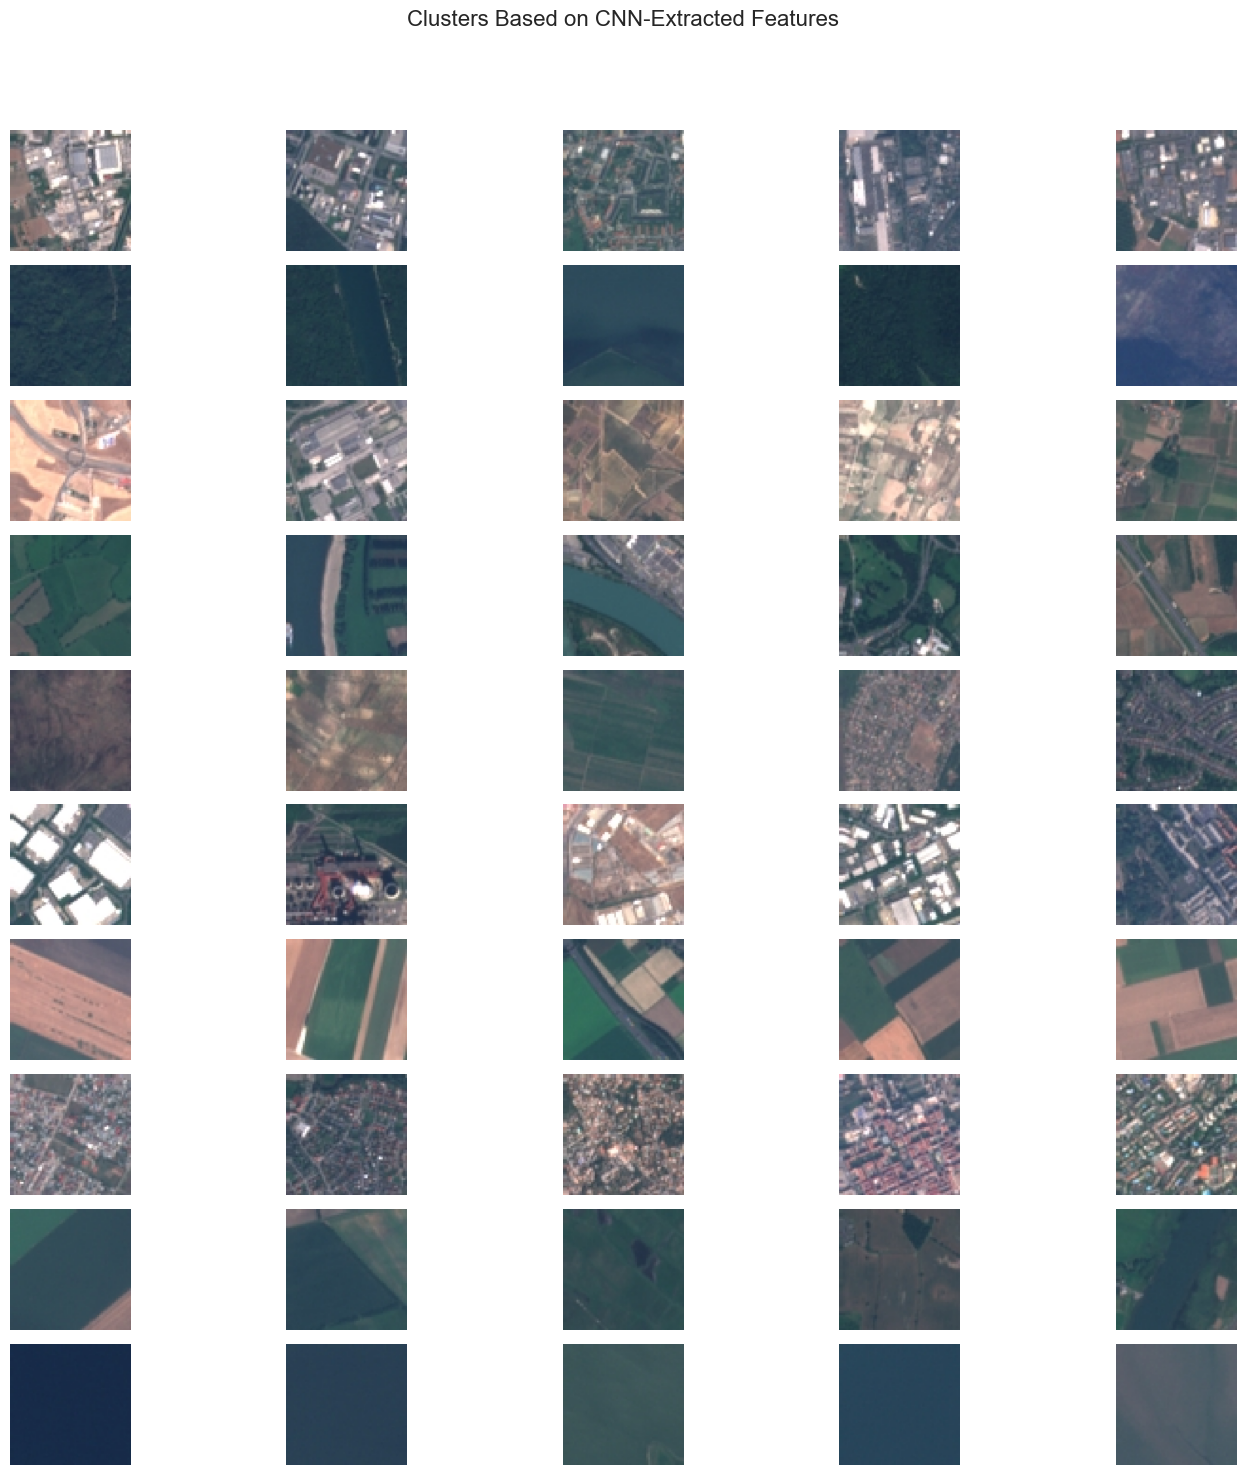

Visualizing clusters based on pixel values:


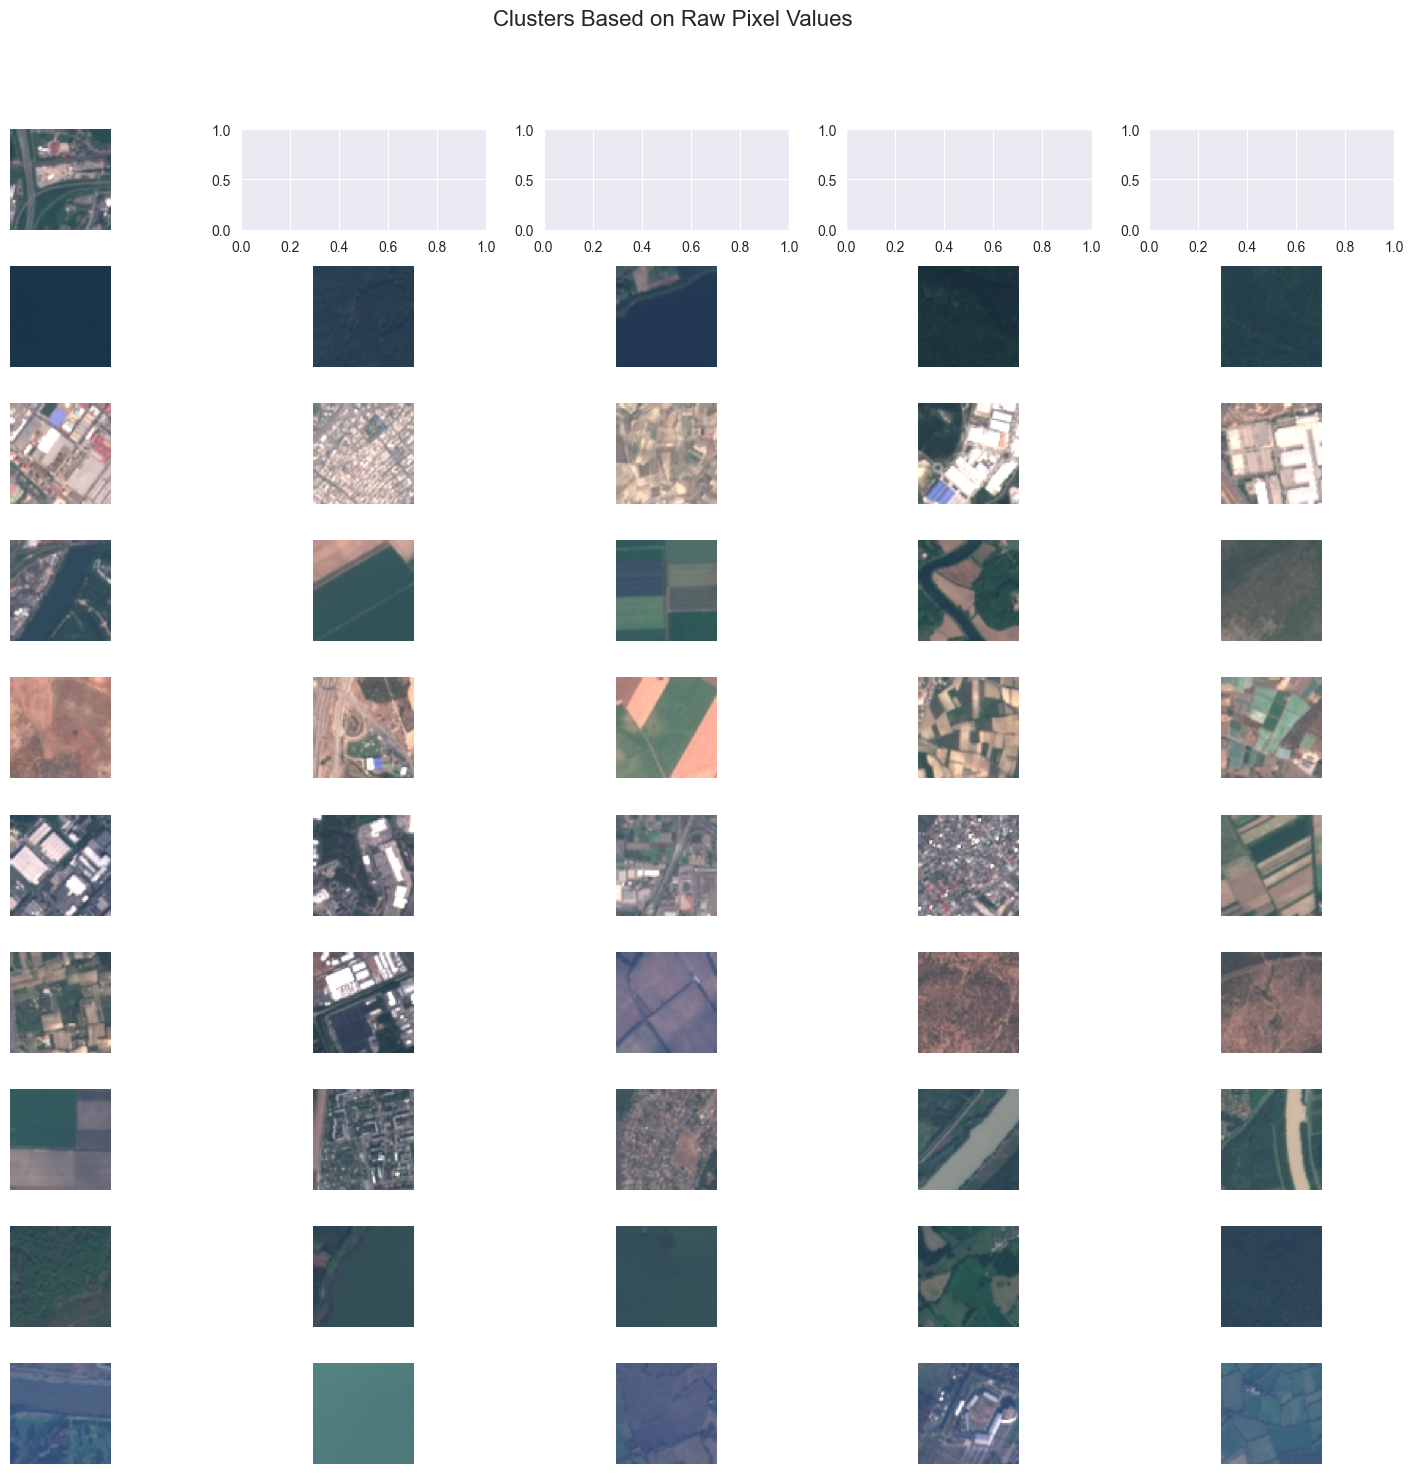

In [25]:
#2e

import random
import matplotlib.pyplot as plt

# Function to visualize clusters
def cluster_visualization(image_data, cluster_assignments, title, num_clusters=10, samples_per_cluster=5):
    fig, axes = plt.subplots(num_clusters, samples_per_cluster, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    for cluster_idx in range(num_clusters):
        cluster_indices = [i for i, lbl in enumerate(cluster_assignments) if lbl == cluster_idx]
        selected_indices = random.sample(cluster_indices, min(samples_per_cluster, len(cluster_indices)))

        for j, img_idx in enumerate(selected_indices):
            ax = axes[cluster_idx, j]
            ax.imshow(image_data[img_idx].reshape(224, 224, 3).astype("uint8"))
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Visualizing clusters based on CNN-extracted features
print("Visualizing clusters based on CNN features:")
cluster_visualization(
    image_data=[dataset[i][0] for i in range(len(dataset))],
    cluster_assignments=kmeans_labels,
    title="Clusters Based on CNN-Extracted Features"
)

# Visualizing clusters based on raw pixel values
print("Visualizing clusters based on pixel values:")
cluster_visualization(
    image_data=[dataset[i][0] for i in range(len(dataset))],
    cluster_assignments=cluster_assignments,
    title="Clusters Based on Raw Pixel Values"
)


Βασει των plots που λαβαμε, ειναι εμφανες οτι το clustering που καναμε με την μεθοδο του ετοιμου CNN, ειναι αποτελεσματικοτερο. Με αυτη, πολλα clusters μοιραζονται κοινα χαρακτηριστικα και εχουν παρομοια μοτιβα.
Επισης, ειναι ευληπτη η διαφορα, μεταξυ των clusters. Ακομη και οταν υπαρχει μικρη αλλα ασιθητη διαφορα μιας εικονας απο τις υπολοιπες που ανηκουν στο cluster της, ορισμενα κοινα χαρακτηριστικα που μοιραζονται ολες οι εικονες του cluster, απο κοινου, ειναι παρατηρισιμα.

Αντιθετως, χωρις την χρηση του CNN, υπαρχουν εικονες οι οποιες δεν μοιραζονται κανενα κοινο χαρακτηριστικο με τις υπολοιπες εικονες που ανηκουν στο cluster τους. Επιπλεον, η διακριση μεταξυ των διαφορων clusters δεν ειναι και τοσο ευκολα επιτευξιμη.

Επιπλεον, παρατηρω οτι εγινε μια κατανομη βασει χρωματος (των pixel), κατι το οποιο ειναι αναμενομενο και λογικο


Παρατηρηση: Το 1ο cluster διαθετει μονο μια εικονα (οταν δεν χρησιμοποιουμε το CNN)